##### 나이에 따른 생존자와 사망자

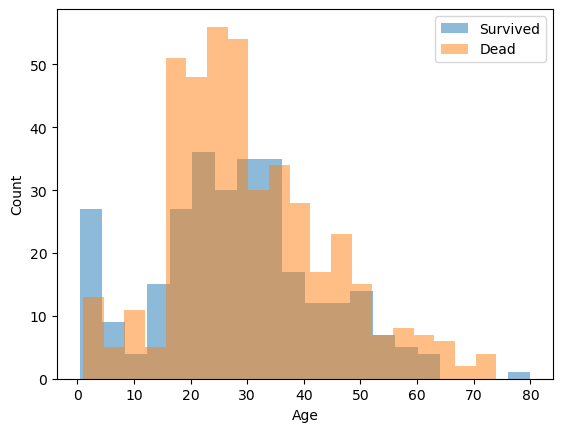

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./titanic/train.csv')

survived_1 = df[df['Survived'] == 1]
dead_1 = df[df['Survived'] == 0]

survived_age_1 = survived_1['Age'].dropna()
dead_age_1 = dead_1['Age'].dropna()

plt.hist(survived_age_1, bins=20, alpha=0.5, label='Survived')
plt.hist(dead_age_1, bins=20, alpha=0.5, label='Dead')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

#### 객실 등급별 생존자와 사망자

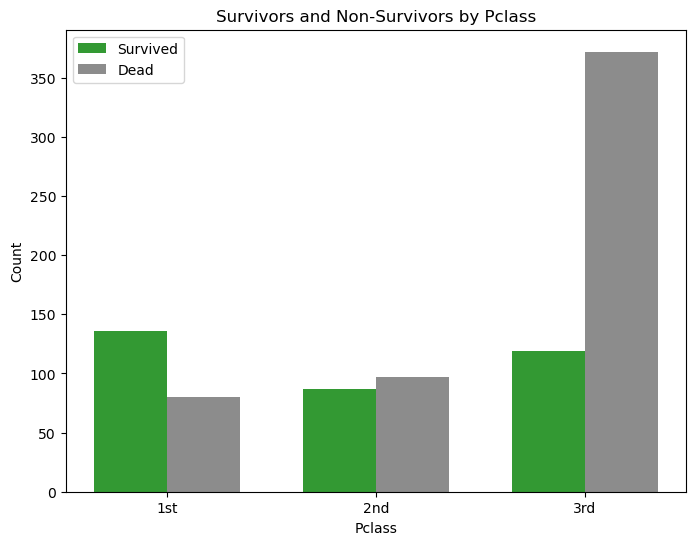

In [9]:
# 객실 등급별 생존자와 사망자 수 계산
survived_by_pclass = df[df['Survived'] == 1]['Pclass'].value_counts().sort_index()
dead_by_pclass = df[df['Survived'] == 0]['Pclass'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
x = survived_by_pclass.index
width = 0.35

plt.bar(x - width/2, survived_by_pclass, width, label='Survived', alpha=0.8, color='green')
plt.bar(x + width/2, dead_by_pclass, width, label='Dead', alpha=0.9, color='gray')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survivors and Non-Survivors by Pclass')    # 객실 등급별 생존자와 사망자의 수
plt.xticks(x, ['1st', '2nd', '3rd'])
plt.legend()
plt.show()


#### 형제자매/배우자의 수에 따른 생존자와 사망자

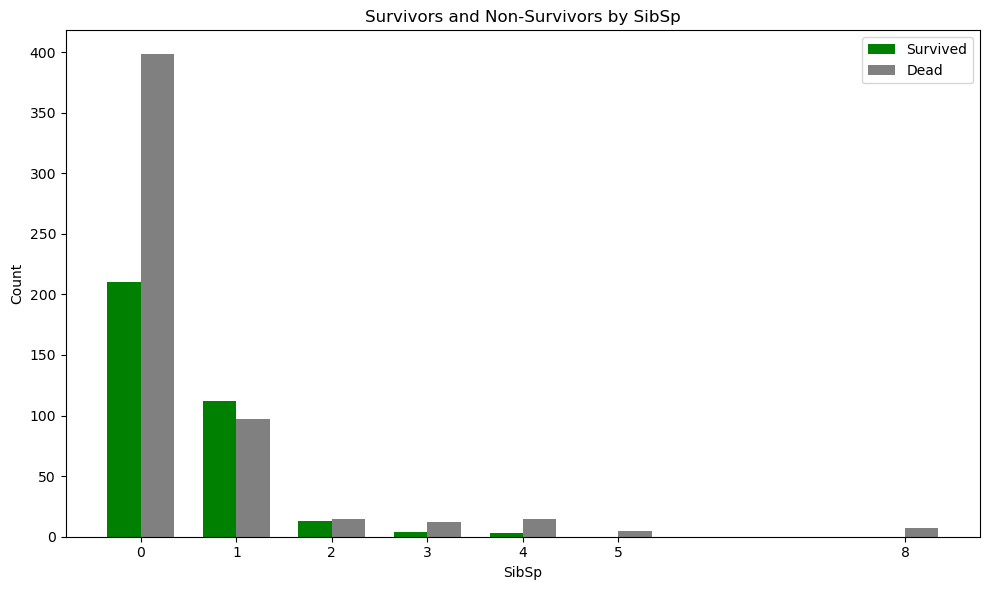

In [10]:
# 모든 SibSp 값들을 포함하는 데이터프레임 생성
all_sibsp = pd.DataFrame(df['SibSp'].unique(), columns=['SibSp']).sort_values('SibSp')

# 형제자매/배우자의 수(SibSp)를 기준으로 생존자와 사망자 그룹화 및 인원수 계산
survived_by_sibsp = df[df['Survived'] == 1]['SibSp'].value_counts()
dead_by_sibsp = df[df['Survived'] == 0]['SibSp'].value_counts()

# 모든 SibSp 값들에 대해 생존자와 사망자 수 계산
all_sibsp['Survived'] = all_sibsp['SibSp'].apply(lambda x: survived_by_sibsp[x] if x in survived_by_sibsp else 0)
all_sibsp['Dead'] = all_sibsp['SibSp'].apply(lambda x: dead_by_sibsp[x] if x in dead_by_sibsp else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))

x = all_sibsp['SibSp']
width = 0.35

plt.bar(x - width/2, all_sibsp['Survived'], width, label='Survived', color='green')
plt.bar(x + width/2, all_sibsp['Dead'], width, label='Dead', color='gray')

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Survivors and Non-Survivors by SibSp')
plt.xticks(x, x.tolist())
plt.legend()

plt.tight_layout()
plt.show()

#### 지역별 남자와 여자의 비율

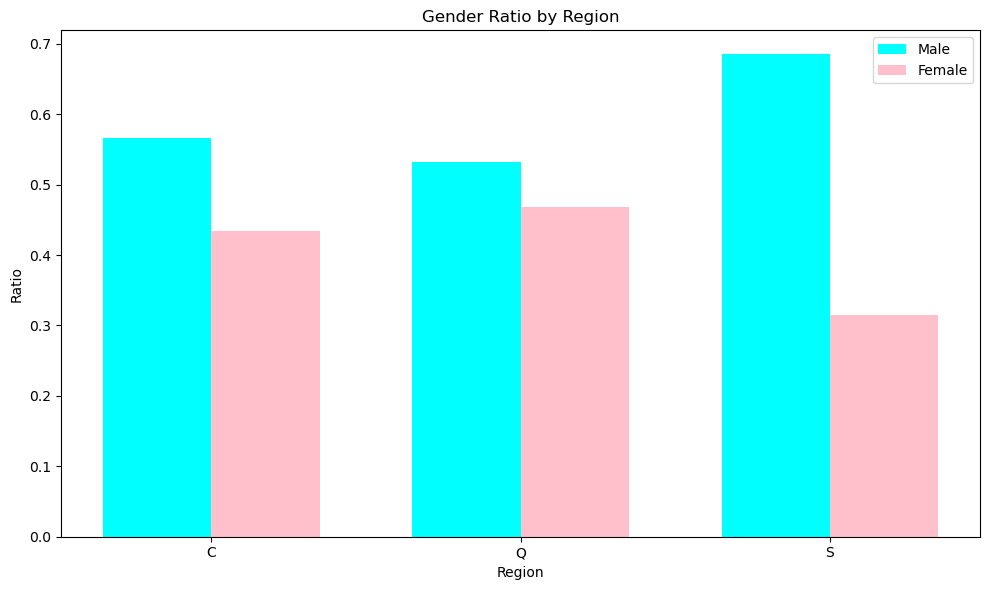

In [11]:
# 지역별로 남자와 여자를 구분하여 인원수 계산
gender_counts_by_region = df.groupby(['Embarked', 'Sex']).size().unstack()

# 비율 계산
total_counts_by_region = gender_counts_by_region.sum(axis=1)
male_ratio_by_region = gender_counts_by_region['male'] / total_counts_by_region
female_ratio_by_region = gender_counts_by_region['female'] / total_counts_by_region

# 그래프 그리기
plt.figure(figsize=(10, 6))

x = np.arange(len(gender_counts_by_region.index))
width = 0.35

plt.bar(x - width/2, male_ratio_by_region, width, label='Male', color='cyan')
plt.bar(x + width/2, female_ratio_by_region, width, label='Female', color='pink')

plt.xlabel('Region')
plt.ylabel('Ratio')
plt.title('Gender Ratio by Region')
plt.xticks(x, gender_counts_by_region.index.tolist())
plt.legend()

plt.tight_layout()
plt.show()


#### 지역별 남녀의 비율과 사망한 남녀의 비율

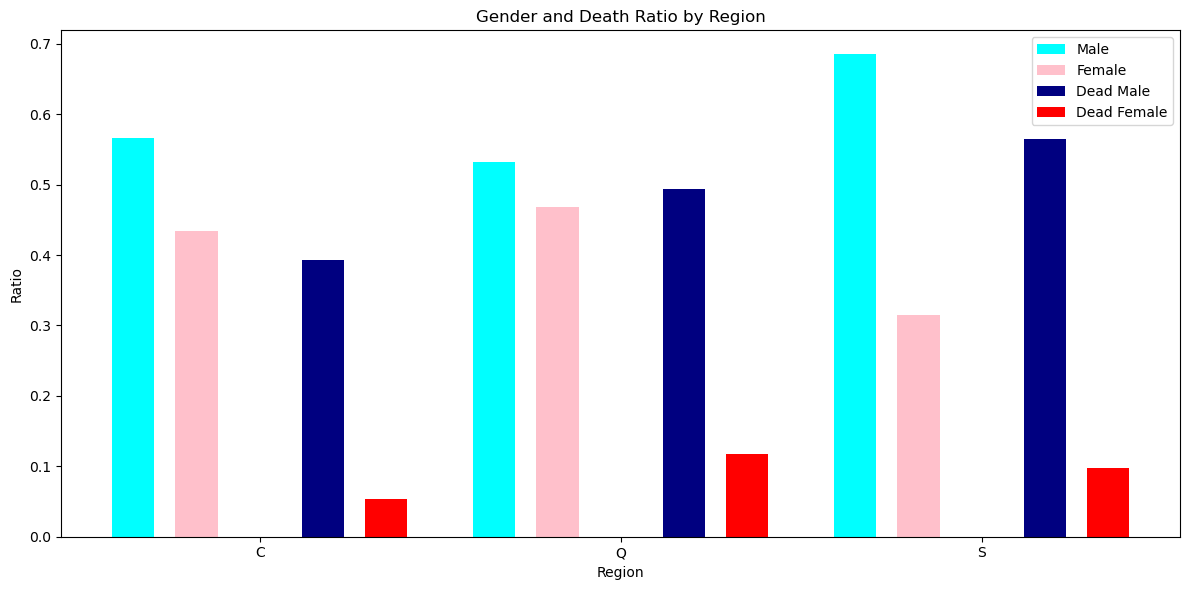

In [12]:
# 지역별로 남자와 여자를 구분하여 인원수 계산
gender_counts_by_region = df.groupby(['Embarked', 'Sex']).size().unstack()

# 비율 계산
total_counts_by_region = gender_counts_by_region.sum(axis=1)
male_ratio_by_region = gender_counts_by_region['male'] / total_counts_by_region
female_ratio_by_region = gender_counts_by_region['female'] / total_counts_by_region

# 사망자 비율 계산 (성별로 구분)
dead_counts_by_gender_and_region = df[df['Survived'] == 0].groupby(['Embarked', 'Sex']).size().unstack()
dead_male_ratio_by_region = dead_counts_by_gender_and_region['male'] / total_counts_by_region
dead_female_ratio_by_region = dead_counts_by_gender_and_region['female'] / total_counts_by_region

# 그래프 그리기
plt.figure(figsize=(12, 6))

x = np.arange(len(gender_counts_by_region.index))
width = 0.35

plt.bar(x - width, male_ratio_by_region, width/3, label='Male', color='cyan')
plt.bar(x - width/2, female_ratio_by_region, width/3, label='Female', color='pink')
plt.bar(x + width/2, dead_male_ratio_by_region, width/3, label='Dead Male', color='navy')
plt.bar(x + width, dead_female_ratio_by_region, width/3, label='Dead Female', color='red')

plt.xlabel('Region')
plt.ylabel('Ratio')
plt.title('Gender and Death Ratio by Region')
plt.xticks(x, gender_counts_by_region.index.tolist())
plt.legend()

plt.tight_layout()
plt.show()

#### 객실정보의 유무에 따른 생존자와 사망자

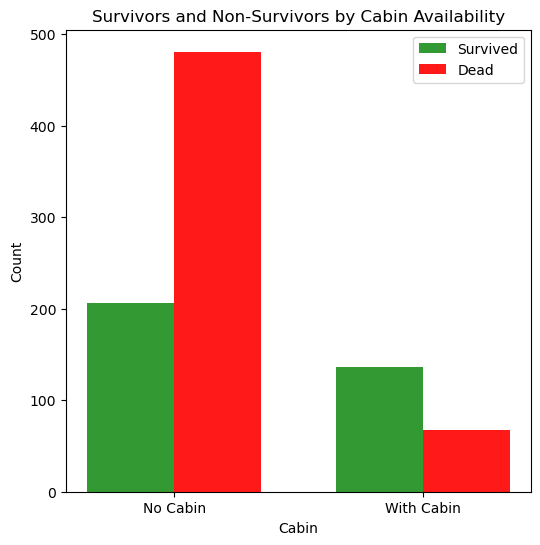

In [13]:
# 객실정보의 유무(Cabin)를 기준으로 생존자와 사망자 그룹화 및 인원수 계산
survived_with_cabin = df[df['Survived'] == 1]['Cabin'].notnull().value_counts()
dead_with_cabin = df[df['Survived'] == 0]['Cabin'].notnull().value_counts()

# 그래프 그리기
plt.figure(figsize=(6, 6))
x = np.arange(2)
width = 0.35

plt.bar(x - width/2, survived_with_cabin, width, label='Survived', alpha=0.8, color='green')
plt.bar(x + width/2, dead_with_cabin, width, label='Dead', alpha=0.9, color='red')

plt.xlabel('Cabin')
plt.ylabel('Count')
plt.title('Survivors and Non-Survivors by Cabin Availability')    # 객실정보의 유무에 따른 생존자와 사망자의 수
plt.xticks(x, ['No Cabin', 'With Cabin'])
plt.legend()
plt.show()